Import libraris

Import dataset

Check null values

Head

Set alpha value

Do ewma on passengers

Plot it

Create function of ewma 

Plot it

Import ses

Create object ses on Passengers

Check what df.index does


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\New folder\Time Series Analysis, Forecasting, and Machine Learning\airline_passengers.csv", index_col= "Month", parse_dates= True)

In [3]:
df.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [4]:
df.isnull().sum()

Passengers    0
dtype: int64

In [5]:
df["EWMA"] = df["Passengers"].ewm(alpha = 0.2, adjust = False).mean()

In [6]:
df

,Passengers,EWMA
Month,,
1949-01-01,112,112.000000
1949-02-01,118,113.200000
1949-03-01,132,116.960000
1949-04-01,129,119.368000
1949-05-01,121,119.694400
...,...,...
1960-08-01,606,512.214093
1960-09-01,508,511.371274
1960-10-01,461,501.297019


<AxesSubplot:xlabel='Month'>

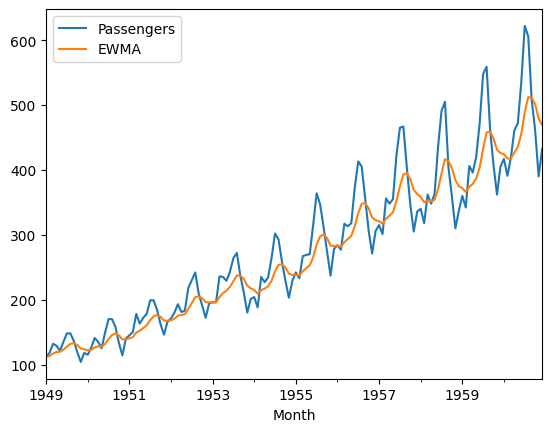

In [7]:
df.plot()

In [8]:
#empty list
alpha = 0.2
manual_ewma = []
for x in df["Passengers"].to_numpy():
    if len(manual_ewma) > 0:
        xhat = alpha * x + (1 - alpha) * manual_ewma[-1]
    else:
        xhat = x
    manual_ewma.append(xhat)
df["Manual"] = manual_ewma

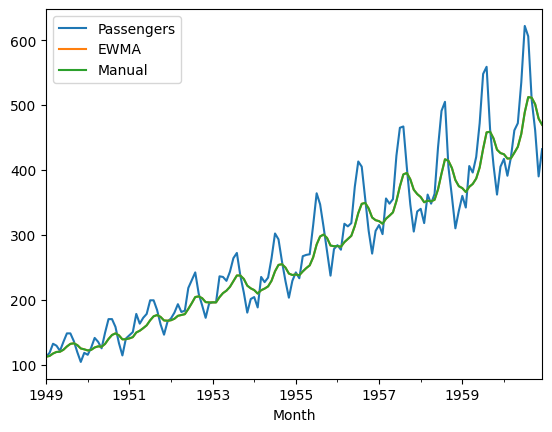

In [9]:
x = df.plot()

In [10]:
x

<AxesSubplot:xlabel='Month'>

In [11]:
df.drop("Manual", axis = 1, inplace = True)

In [12]:
df

,Passengers,EWMA
Month,,
1949-01-01,112,112.000000
1949-02-01,118,113.200000
1949-03-01,132,116.960000
1949-04-01,129,119.368000
1949-05-01,121,119.694400
...,...,...
1960-08-01,606,512.214093
1960-09-01,508,511.371274
1960-10-01,461,501.297019


In [13]:
# import ses
# check index of dataset
# set index tomonnth
#  call same function again and assign it to a new column in dataframe 
# df.plot
# df.head
# split your daaset into train and test and od the forecast
#N_test = 12


In [14]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [15]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [16]:
# Since frq is none we will set the frequency
df.index.freq = "MS"

In [17]:
ses = SimpleExpSmoothing(df["Passengers"])

In [18]:
# instaniate the instant of passengers data wit legacy heuristic set it will work just like it did it in old versions
ses = SimpleExpSmoothing(df["Passengers"], initialization_method="legacy-heuristic")

In [19]:
#  call the fit function we're going to use the a fixed alpha and we're going to set optimized equals to false
# so that it does the same calculation as we did previously where smoothing level is alpha and optimized equals to false

res = ses.fit(smoothing_level = alpha, optimized = False)

In [20]:
res

In [21]:
# call predict function on result object since i want the prediction for all dataset we use start = df.index[0] to index[-1] 
res.predict(start = df.index[0], end = df.index[-1])

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    113.200000
1949-04-01    116.960000
1949-05-01    119.368000
                 ...    
1960-08-01    488.767616
1960-09-01    512.214093
1960-10-01    511.371274
1960-11-01    501.297019
1960-12-01    479.037615
Freq: MS, Length: 144, dtype: float64

In [22]:
df["SES"] = res.predict(start = df.index[0], end = df.index[-1])

In [23]:
df

,Passengers,EWMA,SES
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,113.200000,112.000000
1949-03-01,132,116.960000,113.200000
1949-04-01,129,119.368000,116.960000
1949-05-01,121,119.694400,119.368000
...,...,...,...
1960-08-01,606,512.214093,488.767616
1960-09-01,508,511.371274,512.214093
1960-10-01,461,501.297019,511.371274


<AxesSubplot:xlabel='Month'>

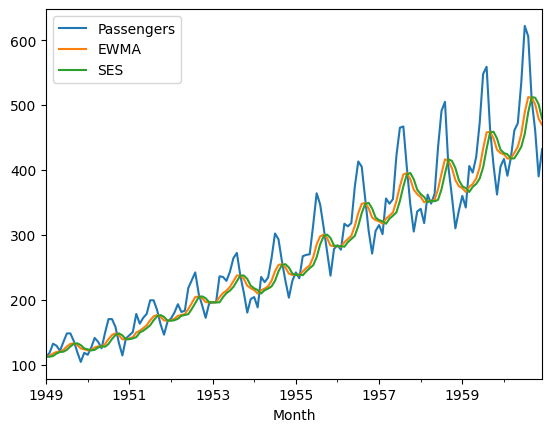

In [24]:
df.plot()

In [25]:
# predict function should actually return same thing as fited value attribute 
# np.allclose(a, b)   ---> Returns True if two arrays are element-wise equal within a tolerance. df["SES"], res.fittedvalues
np.allclose(df["SES"], res.fittedvalues)

True

In [26]:
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]
train["Passengers"]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1959-08-01    559
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
Freq: MS, Name: Passengers, Length: 132, dtype: int64

In [27]:
ses = SimpleExpSmoothing(train["Passengers"], initialization_method="legacy-heuristic")
res = ses.fit()

In [28]:
res

In [29]:
# Boolean Series to index df rows

train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]
test_idx

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [30]:
df.loc[train_idx, "SESfitted"] = res.fittedvalues
df.loc[test_idx, "SESfitted"] = res.forecast(N_test)

<AxesSubplot:xlabel='Month'>

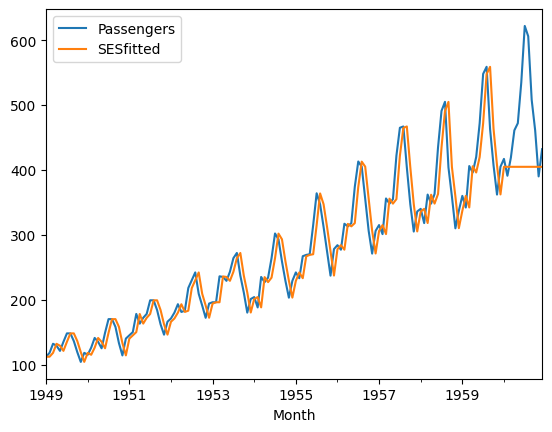

In [31]:
df[["Passengers", "SESfitted"]].plot()

In [32]:
res.params
# check the value of alpha

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [33]:
from statsmodels.tsa.holtwinters import Holt

In [34]:
holt = Holt(df["Passengers"], initialization_method="legacy-heuristic")

In [35]:
 res_h = holt.fit()

In [36]:
res_h

In [37]:
df["Holt"] = res_h.fittedvalues

In [38]:
df

,Passengers,EWMA,SES,SESfitted,Holt
Month,,,,,
1949-01-01,112,112.000000,112.000000,112.000000,113.424104
1949-02-01,118,113.200000,112.000000,112.000000,113.474828
1949-03-01,132,116.960000,113.200000,117.970000,119.464366
1949-04-01,129,119.368000,116.960000,131.929850,133.477561
1949-05-01,121,119.694400,119.368000,129.014649,130.543312
...,...,...,...,...,...
1960-08-01,606,512.214093,488.767616,404.786132,624.226654
1960-09-01,508,511.371274,512.214093,404.786132,608.663524
1960-10-01,461,501.297019,511.371274,404.786132,510.647750


<AxesSubplot:xlabel='Month'>

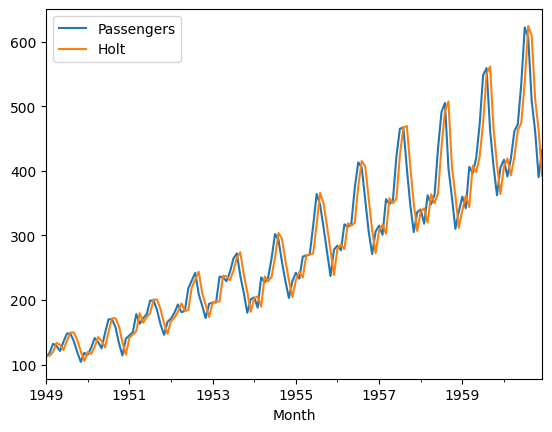

In [39]:
df[["Passengers", "Holt"]].plot()

# NO!

In [40]:
 df["Holt-1"] = df["Holt"].shift(-1)

<AxesSubplot:xlabel='Month'>

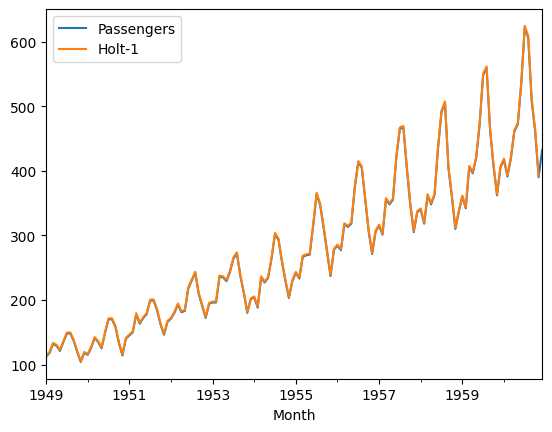

In [41]:
df[["Passengers", "Holt-1"]].plot()

In [42]:
holt = Holt(train["Passengers"], initialization_method = "legacy-heuristic")

In [43]:
res_h = holt.fit()

In [44]:
df.loc[train_idx, "Holt"] = res_h.fittedvalues
df.loc[test_idx, "Holt"] = res_h.forecast(N_test)

In [45]:
df

,Passengers,EWMA,SES,SESfitted,Holt,Holt-1
Month,,,,,,
1949-01-01,112,112.000000,112.000000,112.000000,113.627968,113.474828
1949-02-01,118,113.200000,112.000000,112.000000,113.684981,119.464366
1949-03-01,132,116.960000,113.200000,117.970000,119.674819,133.477561
1949-04-01,129,119.368000,116.960000,131.929850,133.690682,130.543312
1949-05-01,121,119.694400,119.368000,129.014649,130.754580,122.528126
...,...,...,...,...,...,...
1960-08-01,606,512.214093,488.767616,404.786132,420.116137,608.663524
1960-09-01,508,511.371274,512.214093,404.786132,422.031337,510.647750
1960-10-01,461,501.297019,511.371274,404.786132,423.946537,463.183514


<AxesSubplot:xlabel='Month'>

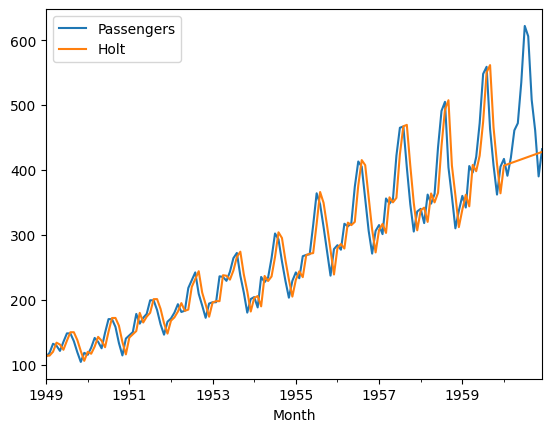

In [46]:
df[["Passengers", "Holt"]].plot()

# HOLT WINTERS MODEL
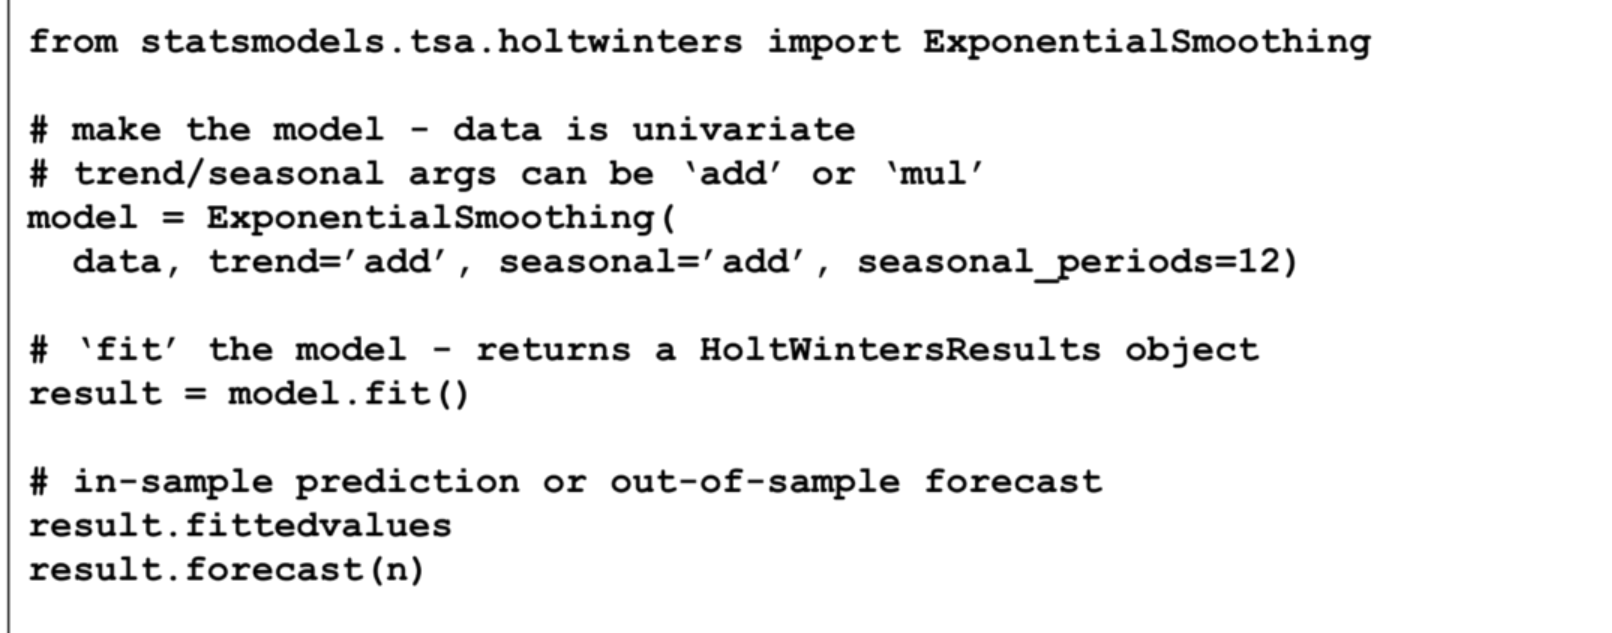

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [59]:
hw = ExponentialSmoothing(train["Passengers"],initialization_method = "legacy-heuristic", trend = "add", seasonal = "add", seasonal_periods = 12)


In [60]:
result_hw = hw.fit()
result_hw

## Insample Prediction

In [61]:
df.loc[train_idx, "HoltWinters"] = result_hw.fittedvalues
# Outsample Forecast
df.loc[test_idx, "HoltWinters"] = result_hw.forecast(N_test)

## OutSample Forecast

<AxesSubplot:xlabel='Month'>

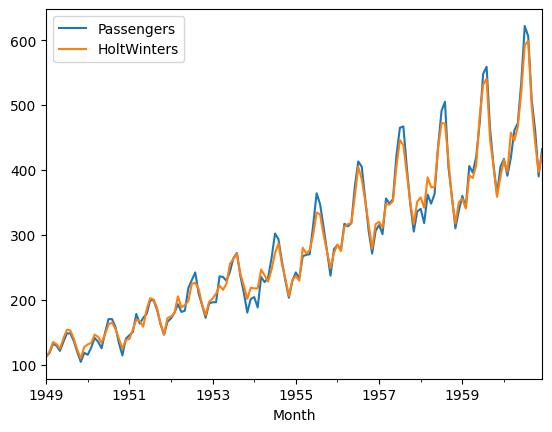

In [62]:
df[["Passengers", "HoltWinters"]].plot()

In [65]:
def rmse(y, t):
    return np.sqrt(np.mean((y-t) **2))

In [66]:
def mae(y, t):
    return np.mean(np.abs(y-t))

In [69]:
print("Train RMSE", rmse(train["Passengers"], result_hw.fittedvalues))
print("Test RMSE", rmse(test["Passengers"], result_hw.forecast(N_test)))

Train RMSE 11.624714430673352
Test RMSE 16.978029847029934


In [70]:
print("Train MAE", mae(train["Passengers"], result_hw.fittedvalues))
print("Test MAE", mae(test["Passengers"], result_hw.forecast(N_test)))

Train MAE 9.006650631052384
Test MAE 13.37759090303536


## Trend Additive, Seasonal Multiplictive 

In [ ]:
hw = 